## ***Optical Character Recognition***
The challenge of extracting text from images of documents has traditionally been referred to as Optical Character Recognition (OCR) and has been the focus of much research. When documents are clearly laid out and have global structure (for example, a business letter), existing tools for OCR can perform quite well. A popular open source tool for OCR is the Tesseract Project, which was originally developed by Hewlett-Packard but has been under the care and feeding of Google in recent years. Tesseract provides an easy-to-use interface as well as an accompanying Python client library, and tends to be a go-to tool for OCR-related projects. More recently, cloud service providers are rolling out text detection capabilities alongside their various computer vision offerings. These include GoogleVision, AWS Textract, Azure OCR, and Dropbox, among others. It is an exciting time in the field, as computer vision techniques are becoming widely available to empower many use cases.



**EasyOCR**

EasyOCR, as the name suggests, is a Python package that allows computer vision developers to effortlessly perform Optical Character Recognition.

When it comes to OCR, EasyOCR is by far the most straightforward way to apply Optical Character Recognition:

The EasyOCR package can be installed with a single pip command.

The dependencies on the EasyOCR package are minimal, making it easy to configure your OCR development environment.

Once EasyOCR is installed, only one import statement is required to import the package into your project.

From there, all you need is two lines of code to perform OCR — one to initialize the Reader class and then another to OCR the image via the readtext function.

![](https://929687.smushcdn.com/2407837/wp-content/uploads/2020/09/easyocr_library.png?lossy=1&strip=1&webp=0)

## ***Implementation Roadmap***

The idea is to be able to plug-in any state-of-the-art model into EasyOCR. There are a lot of geniuses trying to make better detection/recognition models, but we are not trying to be geniuses here. We just want to make their works quickly accessible to the public ... for free. (well, we believe most geniuses want their work to create a positive impact as fast/big as possible) The pipeline should be something like the below diagram. Grey slots are placeholders for changeable light blue modules.

![](https://github.com/JaidedAI/EasyOCR/raw/master/examples/easyocr_framework.jpeg)

In [1]:
pip install easyocr

In [2]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

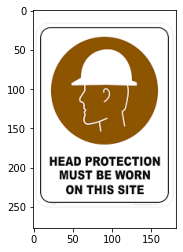

In [3]:
img = cv2.imread("/content/sign.png")
plt.imshow(img)

In [5]:
reader = easyocr.Reader(['en'])
result = reader.readtext(img)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[19, 181], [165, 181], [165, 201], [19, 201]],
  'HEAD PROTECTION',
  0.9751518131320811),
 ([[31, 199], [153, 199], [153, 219], [31, 219]],
  'MUST BE WORN',
  0.7997110670942801),
 ([[39, 219], [145, 219], [145, 237], [39, 237]],
  'ON THIS SITE',
  0.9697418394764509)]

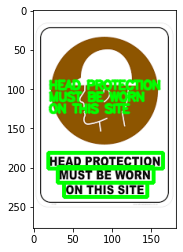

In [7]:
font = cv2.FONT_HERSHEY_SIMPLEX
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()